In [846]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, PrecisionRecallDisplay, precision_score, recall_score, roc_auc_score, RocCurveDisplay, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
import sklearn
theme = 'seismic'
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [847]:
url ='https://raw.githubusercontent.com/mn42899/schulich_data_science/main/Dataset.csv'
df = pd.read_csv(url)

In [848]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [849]:
df['Attrition'].value_counts()

Attrition
No     8597
Yes    1403
Name: count, dtype: int64

In [850]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [852]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [853]:
df['binary_output'] = df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

In [854]:
df['binary_output'].value_counts()

binary_output
0    8597
1    1403
Name: count, dtype: int64

In [855]:
df['binary_output'].value_counts(normalize=True) * 100

binary_output
0    85.97
1    14.03
Name: proportion, dtype: float64

Attrition(Original Features):
Distance from Office     0.164096
Monthly Income           0.017579
Age                      0.012672
Last Raise Percentage   -0.001766
Employee ID             -0.004045
Years at Company        -0.057457
Number of Promotions    -0.063094
Performance Rating      -0.073892
Job Satisfaction        -0.089904
Name: binary_output, dtype: float64


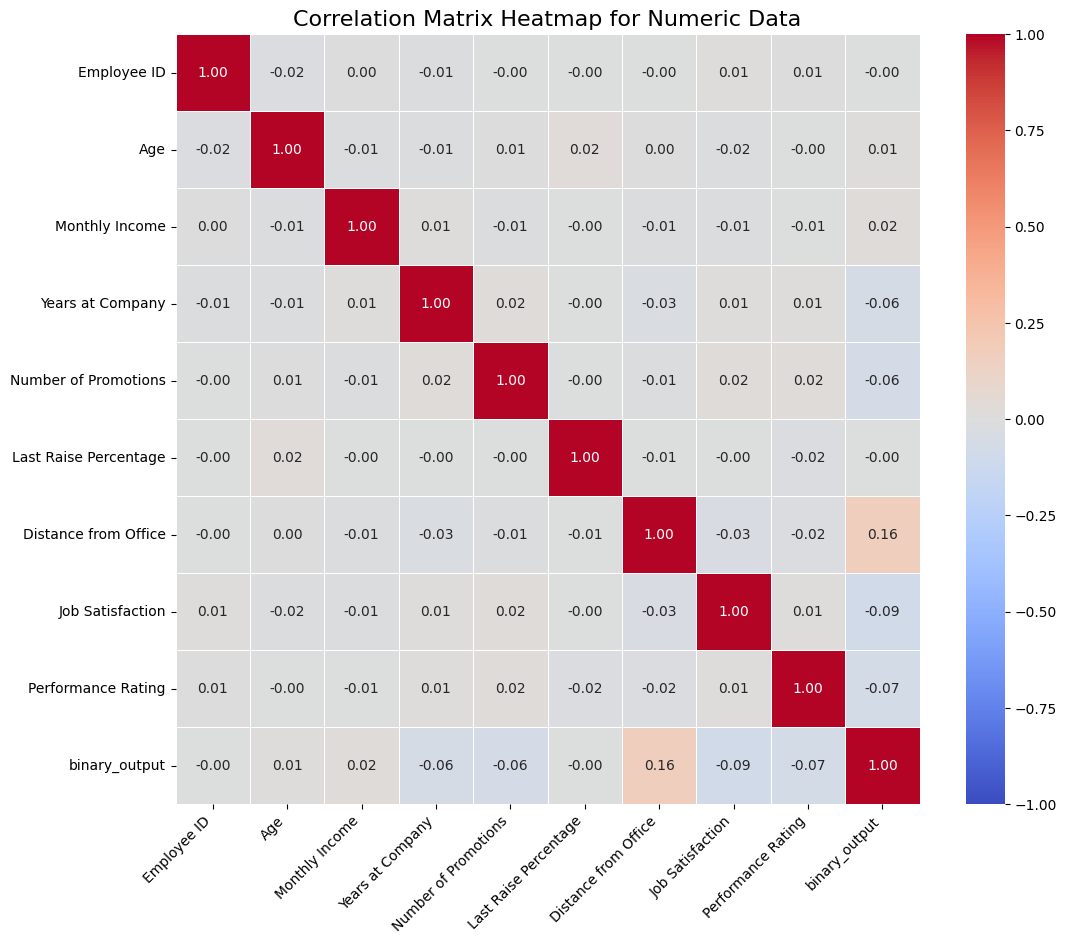

/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_5296/3410507163.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')


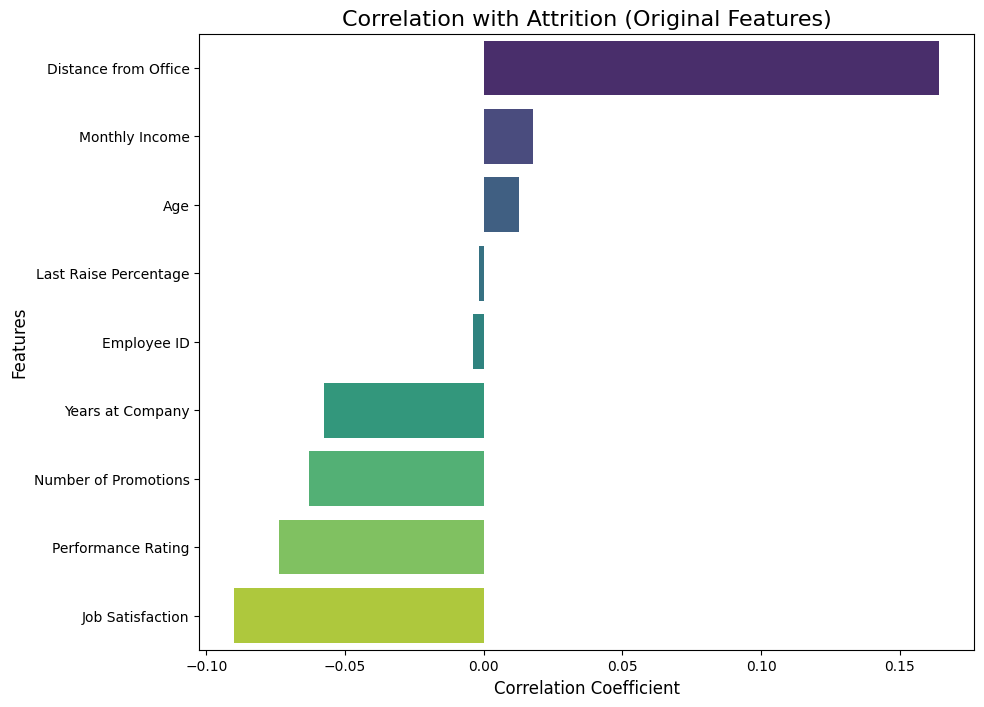

In [856]:
# Correlation Analysis
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

# Correlation with the target variable
attr_corr = corr_matrix['binary_output'].drop('binary_output').sort_values(ascending=False)
print("Attrition(Original Features):")
print(attr_corr)

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap for Numeric Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Bar plot for correlation with attrition
plt.figure(figsize=(10, 8))
sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')
plt.title('Correlation with Attrition (Original Features)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [857]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition', 'binary_output'],
      dtype='object')

Feature Engineering

In [858]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,binary_output
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900,0.140300
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833,0.347315
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000,0.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000,0.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000,0.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000,1.000000


In [859]:
# Work and Distance Scores
df['Tenure_Score'] = pd.qcut(df['Years at Company'], 4, labels=[1, 2, 3, 4])
df['Distance_Score'] = pd.qcut(df['Distance from Office'], 4, labels=[1, 2, 3, 4])

In [860]:
df['Job Role'].value_counts()

Job Role
Technician    2142
HR            2025
Sales         2023
Engineer      1910
Manager       1900
Name: count, dtype: int64

In [861]:
def Role_Categorical(x):
    if x == 'Technician':
        return 1
    elif x == 'HR':
        return 2
    elif x == 'Sales':
        return 3
    elif x == 'Engineer':
        return 4
    elif x == 'Manager':
        return 5
    else:
        return 0

In [862]:
df['Role_Categorical'] = df['Job Role'].apply(Role_Categorical)
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,binary_output,Tenure_Score,Distance_Score,Role_Categorical
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No,0,2,4,2
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes,1,4,4,3
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No,0,2,2,1
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No,0,4,2,1
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No,0,4,4,4


In [863]:
df['Department'].value_counts()

Department
Engineering    2060
Sales          2059
IT             1999
Support        1945
HR             1937
Name: count, dtype: int64

In [864]:
def Dpt_Categorical(x):
    if x == 'Engineering':
        return 1
    elif x == 'Sales':
        return 2
    elif x == 'IT':
        return 3
    elif x == 'Support':
        return 4
    elif x == 'HR':
        return 5
    else:
        return 0

In [865]:
df['Dpt_Categorical'] = df['Department'].apply(Dpt_Categorical)
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,binary_output,Tenure_Score,Distance_Score,Role_Categorical,Dpt_Categorical
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No,0,2,4,2,3
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes,1,4,4,3,4
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No,0,2,2,1,5
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No,0,4,2,1,4
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No,0,4,4,4,2


In [866]:
df['Gender'].value_counts()

Gender
Female    5027
Male      4973
Name: count, dtype: int64

In [867]:
def Gender_Categorical(x):
    if x == 'Male':
        return 1
    elif x == 'Female':
        return 2
    else:
        return 0

In [868]:
df['Gender_Categorical'] = df['Gender'].apply(Gender_Categorical)
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition,binary_output,Tenure_Score,Distance_Score,Role_Categorical,Dpt_Categorical,Gender_Categorical
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No,0,2,4,2,3,1
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes,1,4,4,3,4,1
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No,0,2,2,1,5,1
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No,0,4,2,1,4,1
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No,0,4,4,4,2,2


In [869]:
df['Annual Income'] = df['Monthly Income'] * 12
df['Annual Income']

0       138564
1       103716
2       149016
3       137292
4       110136
         ...  
9995     72948
9996    155352
9997    152400
9998    144156
9999     61620
Name: Annual Income, Length: 10000, dtype: int64

In [870]:
df['Years per Promotion'] = df['Years at Company'].fillna(0) / df['Number of Promotions'].fillna(0)
df['Years per Promotion']

0       12.0
1        7.0
2        3.0
3       25.0
4       12.5
        ... 
9995     inf
9996     5.5
9997     inf
9998     7.0
9999     inf
Name: Years per Promotion, Length: 10000, dtype: float64

In [871]:
# Work Score
df['Income_Score'] = pd.qcut(df['Annual Income'], 4, labels=[1, 2, 3, 4])
df['Performance_Score'] = pd.qcut(df['Performance Rating'], 4, labels=[1, 2, 3, 4])
df['Job_Satisfaction_Score'] = pd.qcut(df['Job Satisfaction'], 4, labels=[1, 2, 3, 4])
df['Last_Raise_Score'] = pd.qcut(df['Last Raise Percentage'], 4, labels=[1, 2, 3, 4])
df['Promotion_Score'] = pd.qcut(df['Number of Promotions'], 4, labels=[1, 2, 3, 4])
# Work Score
df['Work_Score'] = df['Last_Raise_Score'].astype(int) + df['Promotion_Score'].astype(int) + df['Income_Score'].astype(int) + df['Performance_Score'].astype(int) + df['Job_Satisfaction_Score'].astype(int)
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,...,Dpt_Categorical,Gender_Categorical,Annual Income,Years per Promotion,Income_Score,Performance_Score,Job_Satisfaction_Score,Last_Raise_Score,Promotion_Score,Work_Score
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,...,3,1,138564,12.0,3,1,4,3,1,12
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,...,4,1,103716,7.0,2,1,3,1,4,11
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,...,5,1,149016,3.0,4,2,1,1,4,12
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,...,4,1,137292,25.0,3,3,3,3,1,13
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,...,2,2,110136,12.5,3,3,3,2,2,13


In [872]:
df.groupby(['Department', 'binary_output'])['binary_output'].count()

Department   binary_output
Engineering  0                1771
             1                 289
HR           0                1670
             1                 267
IT           0                1729
             1                 270
Sales        0                1777
             1                 282
Support      0                1650
             1                 295
Name: binary_output, dtype: int64

In [873]:
average_distance_at_company = df.groupby('binary_output')['Distance from Office'].mean()
average_distance_at_company

binary_output
0    25.678181
1    32.480038
Name: Distance from Office, dtype: float64

In [874]:
avg_performance = df.groupby('binary_output')['Performance Rating'].mean()
avg_performance

binary_output
0    3.035012
1    2.734854
Name: Performance Rating, dtype: float64

In [875]:
# Number of people with 13 or more years at the company
Attrition_distance = df[df['Distance from Office'] >= 26].shape[0]

# Number of people with less than 13 years at the company
NonAttrition_Distance = df[df['Distance from Office'] <= 27].shape[0]

# Display the results
print(f"Attrition Distance: {Attrition_distance}")
print(f"Non-Attrition Distance: {NonAttrition_Distance}")

Attrition Distance: 5218
Non-Attrition Distance: 4972


Model Building

In [876]:
# Creating the new dataset under specific conditions
attrition_df = df[(df['Distance from Office'] >= 26) & (df['Performance Rating'] < 3)]
attrition_df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,...,Dpt_Categorical,Gender_Categorical,Annual Income,Years per Promotion,Income_Score,Performance_Score,Job_Satisfaction_Score,Last_Raise_Score,Promotion_Score,Work_Score
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,...,3,1,138564,12.00,3,1,4,3,1,12
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,...,4,1,103716,7.00,2,1,3,1,4,11
12,13,43,Male,Engineer,Support,7113,5,4,19.857109,31.958805,...,4,1,85356,1.25,2,1,3,4,4,14
13,14,23,Male,Sales,Sales,12319,6,3,15.935047,48.084284,...,2,1,147828,2.00,4,1,4,4,3,16
16,17,59,Male,Technician,Sales,4107,0,2,18.705093,35.667223,...,2,1,49284,0.00,1,1,3,4,2,11


In [877]:
attrition_df['binary_output'].value_counts()

binary_output
0    1626
1     472
Name: count, dtype: int64

In [878]:
attrition_df['binary_output'].value_counts(normalize=True) * 100

binary_output
0    77.502383
1    22.497617
Name: proportion, dtype: float64

In [879]:
attrition_df.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition', 'binary_output', 'Tenure_Score',
       'Distance_Score', 'Role_Categorical', 'Dpt_Categorical',
       'Gender_Categorical', 'Annual Income', 'Years per Promotion',
       'Income_Score', 'Performance_Score', 'Job_Satisfaction_Score',
       'Last_Raise_Score', 'Promotion_Score', 'Work_Score'],
      dtype='object')

Attrition(Original Features):
Distance from Office     0.183771
Monthly Income           0.026015
Annual Income            0.026015
Employee ID              0.016138
Gender_Categorical       0.009591
Last Raise Percentage    0.009194
Dpt_Categorical          0.005636
Role_Categorical        -0.000105
Age                     -0.018451
Performance Rating      -0.023925
Years at Company        -0.060051
Years per Promotion     -0.060543
Work_Score              -0.084595
Number of Promotions    -0.093623
Job Satisfaction        -0.119374
Name: binary_output, dtype: float64


/var/folders/vc/2zbhjcyn0_9gnlqw17sb6wpw0000gn/T/ipykernel_5296/921043934.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')


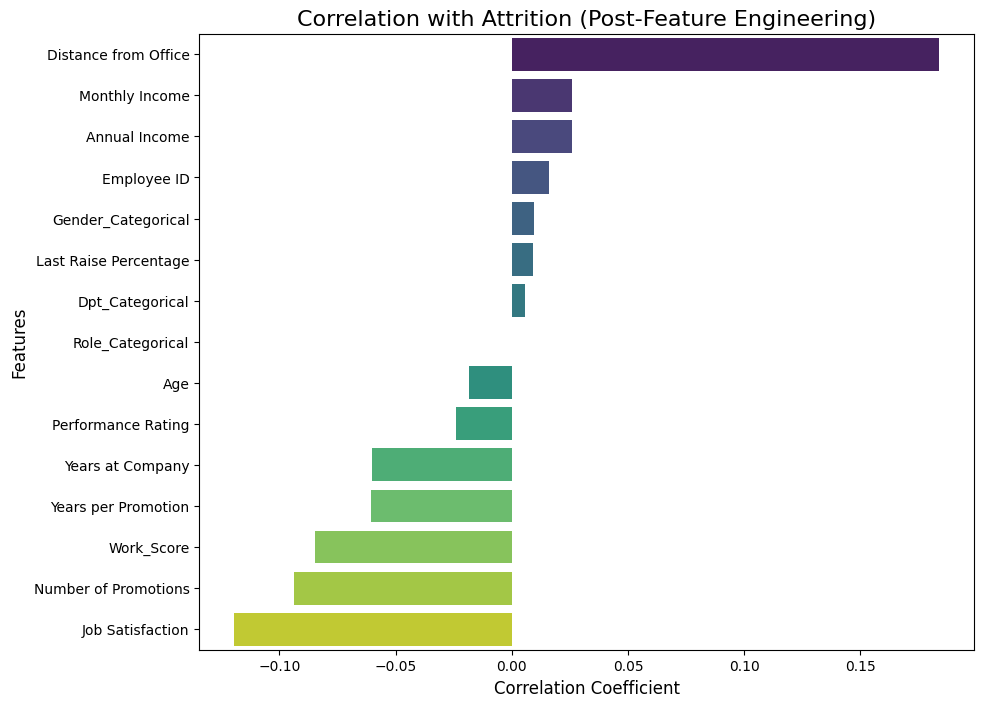

In [920]:
# Correlation Analysis
numerical_features2 = attrition_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix2 = attrition_df[numerical_features2].corr()

# Correlation with the target variable
attr_corr2 = corr_matrix2['binary_output'].drop('binary_output').sort_values(ascending=False)
print("Attrition(Original Features):")
print(attr_corr2)

# Bar plot for correlation with attrition
plt.figure(figsize=(10, 8))
sns.barplot(x=attr_corr.values, y=attr_corr.index, palette='viridis')
plt.title('Correlation with Attrition (Post-Feature Engineering)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [881]:
X = attrition_df[['Distance from Office','Annual Income', 'Gender_Categorical', 'Age',
        'Dpt_Categorical', 'Last Raise Percentage', 'Role_Categorical', 'Years at Company',
        'Number of Promotions', 'Performance Rating', 'Job Satisfaction','Work_Score']]
y = attrition_df['binary_output']

In [882]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [883]:
# build our pipeline that includes these transformations
numeric_columns = ['Distance from Office','Annual Income', 'Age',
                   'Last Raise Percentage', 'Years at Company',
                   'Number of Promotions', 'Performance Rating', 'Job Satisfaction','Work_Score']
categorical_columns = ['Dpt_Categorical', 'Gender_Categorical', 'Role_Categorical']

In [884]:
# test 3 models with cross validation to see which ones work best for this data
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [885]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [886]:
# cross validation to determine in general which model works best for the given problem
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
print(f"knn_scores: {np.mean(knn_scores)}")
print(f"logreg_scores: {np.mean(logreg_scores)}")
print(f"nb_scores: {np.mean(nb_scores)}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


knn_scores: 0.08427393548961609
logreg_scores: 0.017649603644183175
nb_scores: 0.02370766488413547


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [887]:
# build our pipeline
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))])

In [888]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid_LR = {
  'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithms to use in the optimization problem
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'classifier__max_iter': [100, 200, 300]
}

In [889]:
grid_search_LR = GridSearchCV(pipeline_LR, param_grid_LR, cv=5, verbose=1, scoring='f1')
grid_search_LR.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Distance '
                                                                          'from '
                                                                          'Office',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Age',
                                                                          'Last '
                                                                          'Raise '
                                                                          'Percentage',
                                                                          'Years '
                                                                          'at '
                                                                          'Company',
                                                                          'Number '
                                                                          'of '
                                                                          'Promotions',
                                                                          'Performance '
                                                                          'Rating',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work_Score']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dpt_Categorical',
                                                                          'Gender_Categorical',
                                                                          'Role_Categorical'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', 'sag', 'saga']},
             scoring='f1', verbose=1)

In [890]:
final_classifier_LR = LogisticRegression(
    C=grid_search_LR.best_params_['classifier__C'],
    solver=grid_search_LR.best_params_['classifier__solver'],
    penalty=grid_search_LR.best_params_['classifier__penalty'],
    max_iter=grid_search_LR.best_params_['classifier__max_iter']
)

In [891]:
final_pipeline_LR = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier_LR)
                          ])

In [892]:
final_pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Distance from Office',
                                                   'Annual Income', 'Age',
                                                   'Last Raise Percentage',
                                                   'Years at Company',
                                                   'Number of Promotions',
                                                   'Performance Rating',
                                                   'Job Satisfaction',
                                                   'Work_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dpt_Categorical',
                                                   'Gender_Categorical',
                                                   'Role_Categorical'])])),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])

In [893]:
pred_LR = final_pipeline_LR.predict(X_test)
probs_LR = final_pipeline_LR.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       482
           1       0.80      0.03      0.05       148

    accuracy                           0.77       630
   macro avg       0.78      0.51      0.46       630
weighted avg       0.78      0.77      0.68       630



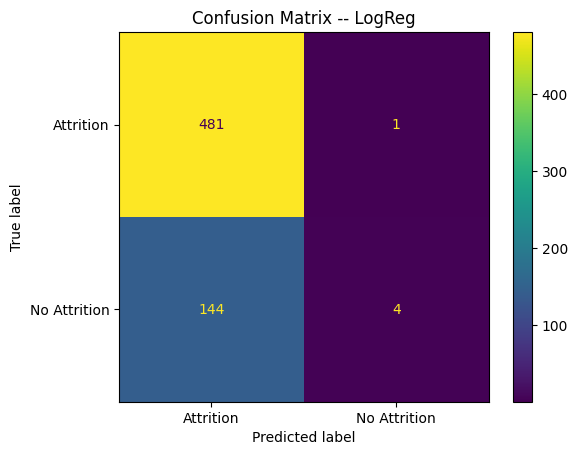

In [894]:
report_LR = classification_report(y_test, pred_LR)
print(report_LR)

# Confusion Matrix for LogReg
ConfusionMatrixDisplay.from_predictions(y_test, pred_LR, display_labels=['Attrition', 'No Attrition'])
plt.title('Confusion Matrix -- LogReg')
plt.show()

KNN

In [895]:
# reserve 30% for testing
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X,y, test_size=0.3, random_state=42)

In [896]:
preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_columns)
    ]
)

In [897]:
# build our pipeline
pipeline_KNN = Pipeline(steps=
                    [
                        ('preprocessor',preprocessor_knn),
                        ('classifier',KNeighborsClassifier())
                    ])

In [898]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid_knn = {
    'classifier__n_neighbors':[5,7,9,15,35,45,55],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan','minkowski']
}

In [899]:
# let's perform gridsearch
grid_search_knn = GridSearchCV(pipeline_KNN, param_grid_knn, cv=5, verbose=1, scoring='f1')
grid_search_knn.fit(X_train_knn,y_train_knn)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Distance '
                                                                          'from '
                                                                          'Office',
                                                                          'Annual '
                                                                          'Income',
                                                                          'Age',
                                                                          'Last '
                                                                          'Raise '
                                                                          'Percentage',
                                                                          'Years '
                                                                          'at '
                                                                          'Company',
                                                                          'Number '
                                                                          'of '
                                                                          'Promotions',
                                                                          'Performance '
                                                                          'Rating',
                                                                          'Job '
                                                                          'Satisfaction',
                                                                          'Work_Score']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Dpt_Categorical',
                                                                          'Gender_Categorical',
                                                                          'Role_Categorical'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [900]:
final_classifier_KNN = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['classifier__n_neighbors'],
                                        metric = grid_search_knn.best_params_['classifier__metric'],
                                        weights = grid_search_knn.best_params_['classifier__weights']
                                        )

In [901]:
final_pipeline_KNN = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor_knn),
                              ('classifier',final_classifier_KNN)
                          ])

In [902]:
final_pipeline_KNN.fit(X_train_knn,y_train_knn)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Distance from Office',
                                                   'Annual Income', 'Age',
                                                   'Last Raise Percentage',
                                                   'Years at Company',
                                                   'Number of Promotions',
                                                   'Performance Rating',
                                                   'Job Satisfaction',
                                                   'Work_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Dpt_Categorical',
                                                   'Gender_Categorical',
                                                   'Role_Categorical'])])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])

In [903]:
pred_knn = final_pipeline_KNN.predict(X_test_knn)
probs_knn = final_pipeline_KNN.predict_proba(X_test_knn)

In [904]:
# Generate classification report
knn_report = classification_report(y_test_knn, pred_knn)
print(knn_report)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       482
           1       0.24      0.08      0.12       148

    accuracy                           0.72       630
   macro avg       0.50      0.50      0.48       630
weighted avg       0.64      0.72      0.67       630



Random Forest

In [905]:
# Create a RandomForestRegressor object
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)

# Splitting the data into training and testing sets
X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(X, y, test_size=0.3, random_state=42)

In [906]:
# Fit the model to the training data
model_RFR.fit(X_train_RFR, y_train_RFR)

RandomForestRegressor(random_state=42)

In [907]:
y_pred_RFR = model_RFR.predict(X_test_RFR)
y_pred_RFR

array([0.17, 0.05, 0.5 , 0.2 , 0.12, 0.28, 0.51, 0.11, 0.01, 0.16, 0.18,
       0.24, 0.13, 0.09, 0.15, 0.19, 0.34, 0.18, 0.34, 0.24, 0.12, 0.19,
       0.31, 0.52, 0.12, 0.15, 0.32, 0.16, 0.6 , 0.12, 0.37, 0.18, 0.15,
       0.24, 0.1 , 0.16, 0.34, 0.13, 0.3 , 0.12, 0.06, 0.15, 0.16, 0.29,
       0.39, 0.61, 0.25, 0.22, 0.13, 0.36, 0.18, 0.3 , 0.48, 0.06, 0.47,
       0.14, 0.16, 0.64, 0.18, 0.24, 0.36, 0.05, 0.66, 0.26, 0.24, 0.32,
       0.18, 0.19, 0.4 , 0.34, 0.14, 0.39, 0.28, 0.05, 0.13, 0.12, 0.06,
       0.26, 0.56, 0.18, 0.19, 0.47, 0.3 , 0.1 , 0.3 , 0.16, 0.13, 0.32,
       0.24, 0.29, 0.49, 0.13, 0.66, 0.14, 0.26, 0.24, 0.16, 0.11, 0.37,
       0.05, 0.11, 0.41, 0.17, 0.31, 0.09, 0.18, 0.19, 0.58, 0.56, 0.67,
       0.27, 0.12, 0.1 , 0.09, 0.03, 0.48, 0.47, 0.01, 0.12, 0.12, 0.09,
       0.15, 0.32, 0.32, 0.12, 0.09, 0.11, 0.29, 0.16, 0.16, 0.56, 0.16,
       0.28, 0.56, 0.21, 0.32, 0.24, 0.13, 0.4 , 0.25, 0.02, 0.43, 0.12,
       0.26, 0.63, 0.35, 0.19, 0.33, 0.61, 0.11, 0.

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       482
           1       0.43      0.28      0.34       148

    accuracy                           0.74       630
   macro avg       0.62      0.58      0.59       630
weighted avg       0.71      0.74      0.72       630



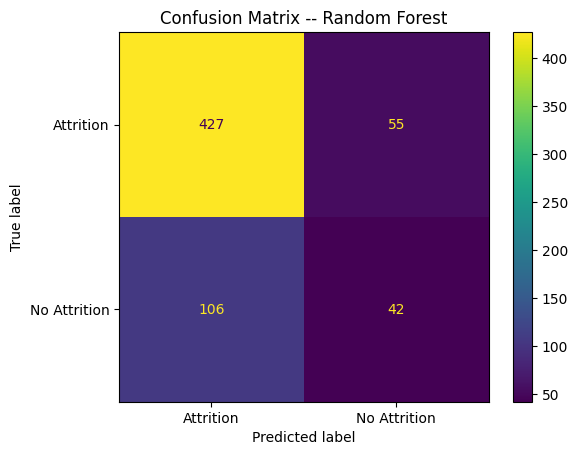

In [919]:
# Convert predictions to binary by applying a threshold
threshold_RFR = 0.4
y_pred_binary_RFR = (y_pred_RFR > threshold_RFR).astype(int)


#  RandomForestRegressor Scores
print(classification_report(y_test_RFR, y_pred_binary_RFR))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test_RFR, y_pred_binary_RFR, display_labels=['Attrition', 'No Attrition'])
plt.title('Confusion Matrix -- Random Forest')
plt.show()

Decision Tree

In [909]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,y, test_size=0.3, random_state=42)

In [910]:
# test decision tree
decTree = Pipeline(steps = [('preprocessor', preprocessor), ('tree', DecisionTreeClassifier(random_state=1))])

# fit model
decTree.fit(X_train_dt, y_train_dt)

# run predictions
pred = decTree.predict(X_test_dt)

# Generate classification report
report = classification_report(y_test_dt, pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       482
           1       0.30      0.29      0.30       148

    accuracy                           0.67       630
   macro avg       0.54      0.54      0.54       630
weighted avg       0.67      0.67      0.67       630



SVM

In [911]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X,y, test_size=0.3, random_state=42)

In [912]:
# test SVM
svm = Pipeline(steps = [('preprocessor', preprocessor), ('svm', SVC(random_state=1))])

# fit
svm.fit(X_train_svm, y_train_svm)

# predict
pred_svm = svm.predict(X_test_svm)

# Generate classification report for SVM
report_svm = classification_report(y_test_svm, pred_svm)
print(report_svm)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       482
           1       0.00      0.00      0.00       148

    accuracy                           0.77       630
   macro avg       0.38      0.50      0.43       630
weighted avg       0.59      0.77      0.66       630



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  